<a href="https://colab.research.google.com/github/riszwinger/tensorflow_cert/blob/main/basic/RockPaperScissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import zipfile

print('TF Version : {}'.format(tf.version.VERSION))
print('GPU is','avaliable' if tf.config.list_physical_devices('GPU') else 'not avaliable'
)

TF Version : 2.6.0
GPU is not avaliable


In [ ]:
# train_url="https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip"
# test_url="https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip"

# data_dir_train=tf.keras.utils.get_file(fname='rps',origin=train_url,extract=True)
# print(data_dir_train)
# data_dir_test=tf.keras.utils.get_file(fname='rps-test-set',origin=test_url,extract=True)
# print(data_dir_test)

In [ ]:

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip


!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-08-30 01:26:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 172.253.123.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   107MB/s    in 1.8s    

2021-08-30 01:26:27 (107 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-08-30 01:26:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving t

In [ ]:
local_zip="/tmp/rps.zip"
zipref=zipfile.ZipFile(local_zip,"r")
zipref.extractall("/tmp/rps")
zipref.close()

local_zip="/tmp/rps-test-set.zip"
zipref=zipfile.ZipFile(local_zip,"r")
zipref.extractall("/tmp/rps-test-set")
zipref.close()

In [ ]:
!ls /tmp/rps/rps

paper  rock  scissors


In [ ]:
!ls /tmp/rps-test-set/rps-test-set/

paper  rock  scissors


In [ ]:
train_dir="/tmp/rps/rps"
test_dir="/tmp/rps-test-set/rps-test-set/"

In [ ]:

class_names=['paper','rock','scissors']
sum=0
for i in class_names:
  cnt=len(os.listdir(os.path.join(train_dir,i)))
  print('Number of {} is {}'.format(i,cnt))
  sum+=cnt
print("="*50)
print('Total Number of Samples in {} directory :{}'.format(train_dir,sum))

Number of paper is 840
Number of rock is 840
Number of scissors is 840
Total Number of Samples in /tmp/rps/rps directory :2520


In [ ]:
import os

def get_count(dir_name,class_names):
  """
  generates the count of files in the subfolder of the given input folder
  dir_name: path of the folder
  class_names (list): class labels , for example ["cats","dogs"]
  """
  sum=0
  for i in class_names:
    cnt=len(os.listdir(os.path.join(dir_name,i)))
    print('# {}: {}'.format(i,cnt))
    sum+=cnt
  print("="*50)
  print('Total # {} directory: {}'.format(dir_name,sum))

In [ ]:
train_dir="/tmp/rps/rps"
class_names=['paper','rock','scissors']

get_count(train_dir,class_names)

# paper: 840
# rock: 840
# scissors: 840
Total # /tmp/rps/rps directory: 2520


In [ ]:
get_count(test_dir,class_names)

# paper: 124
# rock: 124
# scissors: 124
Total # /tmp/rps-test-set/rps-test-set/ directory: 372


## Visualize Image

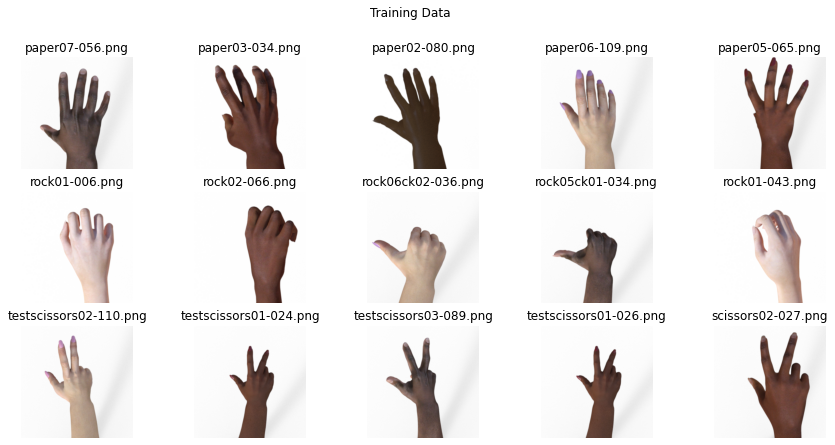

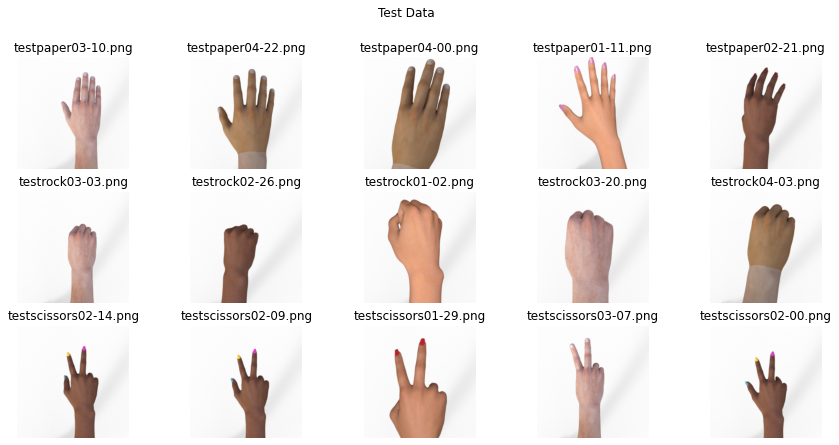

In [ ]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def visualize_data(labels, dir, title):
    """
    Uses matplotlib to visualize PIL images
    :param labels (list) :  list of labels eg: ['cats','dogs']
    :param dir: path of files with labels as subfolders
    :param title: title of the plot
    :return: visualize 5 images from each label randomly
    """
    # labels=['horses','humans']
    num_class = len(labels)
    # train_dir="/tmp/horse-or-human/"
    fig, ax = plt.subplots(num_class, 5, figsize=(15, 7))
    for i in range(num_class):
        for j in range(5):
            img_list = (os.listdir(os.path.join(dir, labels[i])))
            img = img_list[random.randint(0, len(img_list))]
            ax[i, j].imshow(mpimg.imread(os.path.join(dir, labels[i], img)))
            ax[i, j].set_title(img)
            ax[i, j].axis('off')
    plt.suptitle(title)
    plt.show()


## Example
labels=['paper','rock','scissors']
dir=train_dir
title='Training Data'
visualize_data(labels,dir,title)

print("="*100)
## Example
labels=['paper','rock','scissors']
dir=test_dir
title='Test Data'
visualize_data(labels,dir,title)

In [ ]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [ ]:
IMG_SIZE=(180,180)
BATCH_SIZE=32
IMG_SHAPE=IMG_SIZE+(3,)
print(IMG_SHAPE)

(180, 180, 3)


In [ ]:
train_datagen = train_generator.flow_from_directory(train_dir,
                                    target_size=IMG_SIZE,
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='training',)

val_datagen = train_generator.flow_from_directory(train_dir,
                                    target_size=IMG_SIZE,
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='validation')


test_datagen = test_generator.flow_from_directory(test_dir,
                                    target_size=IMG_SIZE,
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical')

Found 2016 images belonging to 3 classes.
Found 504 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
img,lbl=next(iter(train_datagen))

In [ ]:
img[0].shape

(180, 180, 3)

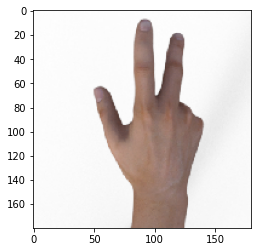

In [ ]:
plt.imshow(img[0])

In [ ]:
lbl[0]

array([0., 0., 1.], dtype=float32)

In [ ]:
STEP_PER_EPOCHS=train_datagen.samples//BATCH_SIZE
VALIDATION_SETPS=val_datagen.samples//BATCH_SIZE
print("STEP_PER_EPOCHS: {}\nVALIDATION_SETPS: {}\nNumber of Classes: {}".format(STEP_PER_EPOCHS,VALIDATION_SETPS,train_datagen.num_classes))

STEP_PER_EPOCHS: 63
VALIDATION_SETPS: 15
Number of Classes: 3


## Model-1

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=IMG_SHAPE))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))

model.add(tf.keras.layers.Dense(train_datagen.num_classes))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history=model.fit(train_datagen,epochs=10,steps_per_epoch=STEP_PER_EPOCHS,validation_data=val_datagen,validation_steps=VALIDATION_SETPS)

Epoch 1/10
63/63 [==============================] - 70s 1s/step - loss: 0.4975 - accuracy: 0.8358 - val_loss: 0.3052 - val_accuracy: 0.8979
Epoch 2/10
63/63 [==============================] - 70s 1s/step - loss: 0.0196 - accuracy: 0.9950 - val_loss: 0.4818 - val_accuracy: 0.8479
Epoch 3/10
63/63 [==============================] - 69s 1s/step - loss: 8.0962e-04 - accuracy: 1.0000 - val_loss: 0.8267 - val_accuracy: 0.7104
Epoch 4/10
63/63 [==============================] - 69s 1s/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.9579 - val_accuracy: 0.6708
Epoch 5/10
63/63 [==============================] - 69s 1s/step - loss: 9.6048e-05 - accuracy: 1.0000 - val_loss: 1.1374 - val_accuracy: 0.6687
Epoch 6/10
63/63 [==============================] - 69s 1s/step - loss: 5.0479e-05 - accuracy: 1.0000 - val_loss: 1.1307 - val_accuracy: 0.6667
Epoch 7/10
63/63 [==============================] - 69s 1s/step - loss: 3.6352e-05 - accuracy: 1.0000 - val_loss: 1.1975 - val_accuracy: 0.6667
Epoc

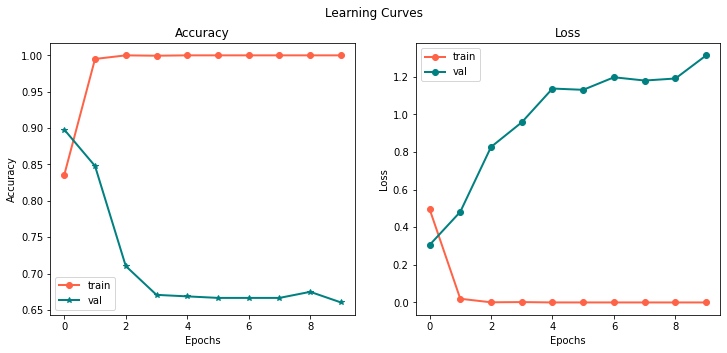

In [ ]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,2,figsize=(12,5))
epochs=range(len(history.history['accuracy']))

ax[0].plot(epochs,history.history['accuracy'],label='train',lw=2,marker='o',color='tomato')
ax[0].plot(epochs,history.history['val_accuracy'],label='val',lw=2,marker='*',color='teal')
ax[0].set_title('Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend()


ax[1].plot(epochs,history.history['loss'],label='train',lw=2,marker='o',color='tomato')
ax[1].plot(epochs,history.history['val_loss'],label='val',lw=2,marker='o',color='teal')
ax[1].set_title('Loss')
ax[1].legend()

ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
plt.suptitle('Learning Curves')
plt.show()

## Massive overfitting
- lets try data augumentation

In [ ]:
from numpy.lib.histograms import histogram_bin_edges
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                validation_split=0.2,rotation_range=0.2,width_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True
                                                            )
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)



train_datagen = train_generator.flow_from_directory(train_dir,
                                    target_size=IMG_SIZE,
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='training',)

val_datagen = train_generator.flow_from_directory(train_dir,
                                    target_size=IMG_SIZE,
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='validation')


test_datagen = test_generator.flow_from_directory(test_dir,
                                    target_size=IMG_SIZE,
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical')

Found 2016 images belonging to 3 classes.
Found 504 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Model-2

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=IMG_SHAPE))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))

model.add(tf.keras.layers.Dense(train_datagen.num_classes))
model.summary()

model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history=model.fit(train_datagen,epochs=5,steps_per_epoch=STEP_PER_EPOCHS,validation_data=val_datagen,validation_steps=VALIDATION_SETPS)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)            

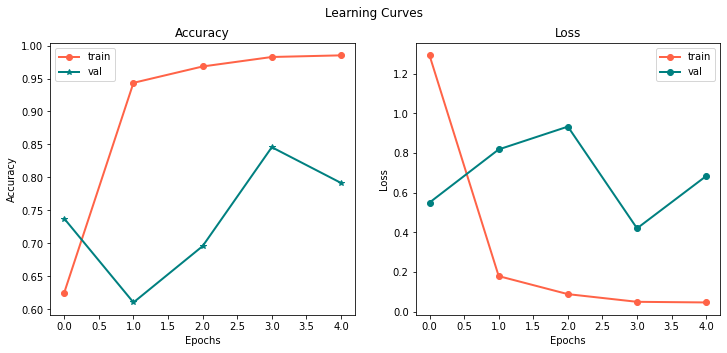

In [ ]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,2,figsize=(12,5))
epochs=range(len(history.history['accuracy']))

ax[0].plot(epochs,history.history['accuracy'],label='train',lw=2,marker='o',color='tomato')
ax[0].plot(epochs,history.history['val_accuracy'],label='val',lw=2,marker='*',color='teal')
ax[0].set_title('Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend()


ax[1].plot(epochs,history.history['loss'],label='train',lw=2,marker='o',color='tomato')
ax[1].plot(epochs,history.history['val_loss'],label='val',lw=2,marker='o',color='teal')
ax[1].set_title('Loss')
ax[1].legend()

ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
plt.suptitle('Learning Curves')
plt.show()

## Still overfitting

- Augumentation does help but not great so try longer epochs with dropout

## Model-3

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=IMG_SHAPE))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(train_datagen.num_classes))
model.summary()

model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history=model.fit(train_datagen,epochs=15,steps_per_epoch=STEP_PER_EPOCHS,validation_data=val_datagen,validation_steps=VALIDATION_SETPS)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 20, 20, 64)       

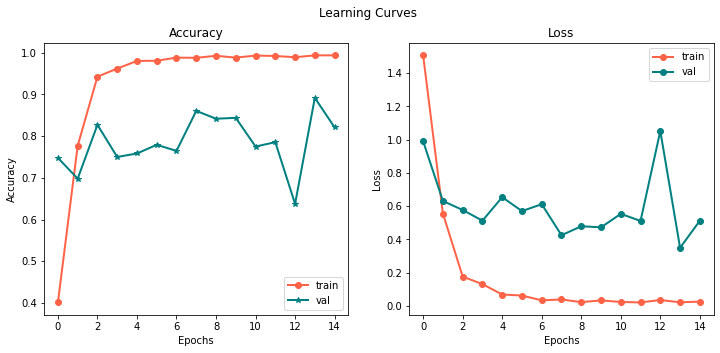

In [ ]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,2,figsize=(12,5))
epochs=range(len(history.history['accuracy']))

ax[0].plot(epochs,history.history['accuracy'],label='train',lw=2,marker='o',color='tomato')
ax[0].plot(epochs,history.history['val_accuracy'],label='val',lw=2,marker='*',color='teal')
ax[0].set_title('Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend()


ax[1].plot(epochs,history.history['loss'],label='train',lw=2,marker='o',color='tomato')
ax[1].plot(epochs,history.history['val_loss'],label='val',lw=2,marker='o',color='teal')
ax[1].set_title('Loss')
ax[1].legend()

ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
plt.suptitle('Learning Curves')
plt.show()

## Model-4

- Still overfitting
- lets change data augumentation
- add dropout

In [ ]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs,logs={}):
    if logs.get('accuracy')>0.99:
      print('Too good to be true, abort now !!!')
      self.model.stop_training=True

callbacks=myCallbacks()


In [ ]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                validation_split=0.3,
                                                                rotation_range=0.3,
                                                                width_shift_range=0.3,
                                                                shear_range=0.3,
                                                                zoom_range=0.3,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,  
                                                            )
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)



train_datagen = train_generator.flow_from_directory(train_dir,
                                    target_size=IMG_SIZE,
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='training',)

val_datagen = train_generator.flow_from_directory(train_dir,
                                    target_size=IMG_SIZE,
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='validation')


test_datagen = test_generator.flow_from_directory(test_dir,
                                    target_size=IMG_SIZE,
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical')


model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=IMG_SHAPE))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(train_datagen.num_classes))
model.summary()

STEP_PER_EPOCHS=train_datagen.samples//BATCH_SIZE
VALIDATION_SETPS=val_datagen.samples//BATCH_SIZE
print("STEP_PER_EPOCHS: {}\nVALIDATION_SETPS: {}\nNumber of Classes: {}".format(STEP_PER_EPOCHS,VALIDATION_SETPS,train_datagen.num_classes))

model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history=model.fit(train_datagen,epochs=15,steps_per_epoch=STEP_PER_EPOCHS,validation_data=val_datagen,validation_steps=VALIDATION_SETPS,callbacks=[callbacks])

Found 1764 images belonging to 3 classes.
Found 756 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 89, 89, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 43, 43, 32)        0      

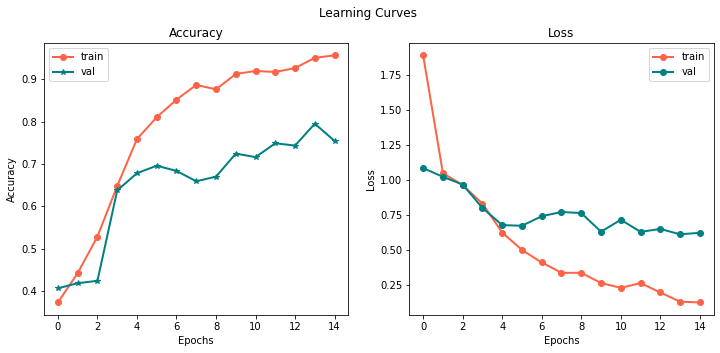

In [ ]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,2,figsize=(12,5))
epochs=range(len(history.history['accuracy']))

ax[0].plot(epochs,history.history['accuracy'],label='train',lw=2,marker='o',color='tomato')
ax[0].plot(epochs,history.history['val_accuracy'],label='val',lw=2,marker='*',color='teal')
ax[0].set_title('Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend()


ax[1].plot(epochs,history.history['loss'],label='train',lw=2,marker='o',color='tomato')
ax[1].plot(epochs,history.history['val_loss'],label='val',lw=2,marker='o',color='teal')
ax[1].set_title('Loss')
ax[1].legend()

ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
plt.suptitle('Learning Curves')
plt.show()

In [ ]:
loss,acc=model.evaluate(test_datagen,verbose=0)
print('Model Accuracy: {} %, Model Loss: {}'.format(round(acc*100),round(loss,2)))

Model Accuracy: 82 %, Model Loss: 0.46


## Still Overfitting , lets add Regularization to mix



In [ ]:
def get_callbacks():
  return [
    # tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    # tf.keras.callbacks.TensorBoard(logdir/name),
  ]

In [ ]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                validation_split=0.3,
                                                                rotation_range=0.3,
                                                                width_shift_range=0.3,
                                                                shear_range=0.3,
                                                                zoom_range=0.3,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,  
                                                            )
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)



train_datagen = train_generator.flow_from_directory(train_dir,
                                    target_size=IMG_SIZE,
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='training',)

val_datagen = train_generator.flow_from_directory(train_dir,
                                    target_size=IMG_SIZE,
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='validation')


test_datagen = test_generator.flow_from_directory(test_dir,
                                    target_size=IMG_SIZE,
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical')


model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=IMG_SHAPE))
model.add(tf.keras.layers.MaxPool2D(2,2))
#model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.MaxPool2D(2,2))
#model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(train_datagen.num_classes))
model.summary()

STEP_PER_EPOCHS=train_datagen.samples//BATCH_SIZE
VALIDATION_SETPS=val_datagen.samples//BATCH_SIZE
print("STEP_PER_EPOCHS: {}\nVALIDATION_SETPS: {}\nNumber of Classes: {}".format(STEP_PER_EPOCHS,VALIDATION_SETPS,train_datagen.num_classes))

model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history=model.fit(train_datagen,epochs=15,steps_per_epoch=STEP_PER_EPOCHS,validation_data=val_datagen,validation_steps=VALIDATION_SETPS,callbacks=get_callbacks())

In [ ]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,2,figsize=(12,5))
epochs=range(len(history.history['accuracy']))

ax[0].plot(epochs,history.history['accuracy'],label='train',lw=2,marker='o',color='tomato')
ax[0].plot(epochs,history.history['val_accuracy'],label='val',lw=2,marker='*',color='teal')
ax[0].set_title('Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend()


ax[1].plot(epochs,history.history['loss'],label='train',lw=2,marker='o',color='tomato')
ax[1].plot(epochs,history.history['val_loss'],label='val',lw=2,marker='o',color='teal')
ax[1].set_title('Loss')
ax[1].legend()

ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
plt.suptitle('Learning Curves')
plt.show()

In [ ]:
loss,acc=model.evaluate(test_datagen,verbose=0)
print('Model Accuracy: {} %, Model Loss: {}'.format(round(acc*100),round(loss,2)))

## Transfer Learning

In [ ]:
base_model=tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                             include_top=False,
                                             weights='imagenet')
base_model.trainable=False

In [ ]:
inputs=tf.keras.layers.Input(shape=(224,224,3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(3)(x)
model=tf.keras.Model(inputs,outputs)  
model.summary()

In [ ]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    # rescale=1./255,
                                                                validation_split=0.3,
    #                                                             rotation_range=0.3,
    #                                                             width_shift_range=0.3,
    #                                                             shear_range=0.3,
    #                                                             zoom_range=0.3,
    #                                                             horizontal_flip=True,
    #                                                             vertical_flip=True,  
                                                            )
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    # rescale=1./255
    )



train_datagen = train_generator.flow_from_directory(train_dir,
                                    target_size=(224,224),
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='training',)

val_datagen = train_generator.flow_from_directory(train_dir,
                                    target_size=(224,224),
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='validation')


test_datagen = test_generator.flow_from_directory(test_dir,
                                    target_size=(224,224),
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical')

STEP_PER_EPOCHS=train_datagen.samples//BATCH_SIZE
VALIDATION_SETPS=val_datagen.samples//BATCH_SIZE
print("STEP_PER_EPOCHS: {}\nVALIDATION_SETPS: {}\nNumber of Classes: {}".format(STEP_PER_EPOCHS,VALIDATION_SETPS,train_datagen.num_classes))

model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history=model.fit(train_datagen,epochs=15,steps_per_epoch=STEP_PER_EPOCHS,validation_data=val_datagen,validation_steps=VALIDATION_SETPS,callbacks=get_callbacks())

In [ ]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,2,figsize=(12,5))
epochs=range(len(history.history['accuracy']))

ax[0].plot(epochs,history.history['accuracy'],label='train',lw=2,marker='o',color='tomato')
ax[0].plot(epochs,history.history['val_accuracy'],label='val',lw=2,marker='*',color='teal')
ax[0].set_title('Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend()


ax[1].plot(epochs,history.history['loss'],label='train',lw=2,marker='o',color='tomato')
ax[1].plot(epochs,history.history['val_loss'],label='val',lw=2,marker='o',color='teal')
ax[1].set_title('Loss')
ax[1].legend()

ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
plt.suptitle('Learning Curves')
plt.show()

In [ ]:
loss,acc=model.evaluate(test_datagen,verbose=0)
print('Model Accuracy: {} %, Model Loss: {}'.format(round(acc*100),round(loss,2)))

In [ ]:
0.05>0.01

## Lets try an old model which worked the best with litlle more

In [ ]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                validation_split=0.3,
                                                                rotation_range=0.3,
                                                                width_shift_range=0.3,
                                                                shear_range=0.3,
                                                                zoom_range=0.3,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,  
                                                            )
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)



train_datagen = train_generator.flow_from_directory(train_dir,
                                    target_size=IMG_SIZE,
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='training',)

val_datagen = train_generator.flow_from_directory(train_dir,
                                    target_size=IMG_SIZE,
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='validation')


test_datagen = test_generator.flow_from_directory(test_dir,
                                    target_size=IMG_SIZE,
                                    seed=123,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical')


model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=IMG_SHAPE))
model.add(tf.keras.layers.MaxPool2D(2,2))
#model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
#model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
#model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
#model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.MaxPool2D(2,2))
#model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(train_datagen.num_classes))
model.summary()

STEP_PER_EPOCHS=train_datagen.samples//BATCH_SIZE
VALIDATION_SETPS=val_datagen.samples//BATCH_SIZE
print("STEP_PER_EPOCHS: {}\nVALIDATION_SETPS: {}\nNumber of Classes: {}".format(STEP_PER_EPOCHS,VALIDATION_SETPS,train_datagen.num_classes))

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEP_PER_EPOCHS*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

optimizer = get_optimizer()

model.compile(optimizer=optimizer,loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history=model.fit(train_datagen,epochs=20,steps_per_epoch=STEP_PER_EPOCHS,validation_data=val_datagen,validation_steps=VALIDATION_SETPS,callbacks=get_callbacks())